# QBSC (Quantum Bit String Comparator)

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
initializeState = stateGenerator('010')
qc.initialize(initializeState, qr)
getBloch(qc);

Current state:  2
Init state array:  [0, 0, 1, 0, 0, 0, 0, 0]


In [6]:
qc.csx(1, 2) # = qc.crx(pi/2,1,2)
qc.cx(0, 1)
# Inverse controlled square not gate 
qc.crx(pi/2, 0, 2)
qc.csx(1, 2)
qc.cx(0, 1)
qc.barrier()
for i in range(0, 3):
    qc.measure(i,i) 

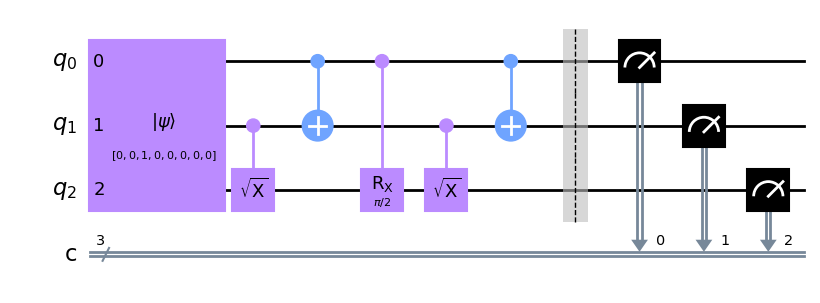

In [9]:
qc.draw('mpl')

['110']


/opt/conda/envs/qiskit/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


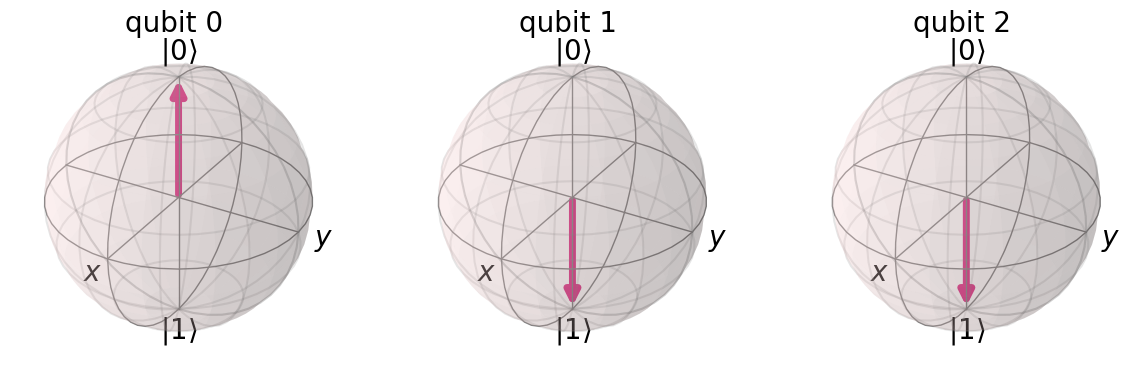

In [10]:
print(getMeasure(qc, 1))
getBloch(qc)
#q2 return 1 when q1>q2

In [13]:
# Convert a circuit to gate
qr = QuantumRegister(3)
circQBSC = QuantumCircuit(qr)
circQBSC.csx(1, 2) # = qc.crx(pi/2,1,2)
circQBSC.cx(0, 1)
# Inverse controlled square not gate 
circQBSC.crx(pi/2, 0, 2)
circQBSC.csx(1, 2)
circQBSC.cx(0, 1)

In [14]:
qbsc = circQBSC.to_gate(label=' QBSC')

In [15]:
qc2 = QuantumCircuit(7)
qc2.append(qbsc, [0,1,2])

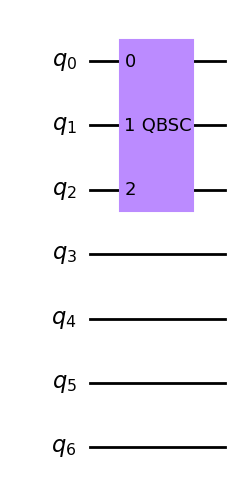

In [18]:
qc2.draw('mpl')

In [19]:
# Midpoint Qubit Comparision Circuit (MQC)

# less than and greater than
circmqc = QuantumCircuit(4)
circmqc.cx(0, 2)
circmqc.crx(-pi/2, 2,3)
circmqc.cx(1, 2)
circmqc.csx(1, 3)
circmqc.csx(2,3)
circmqc.cx(3,2)
# circmqc.barrier()
# equal 
circmqc.x(0)
circmqc.cx(0,1)

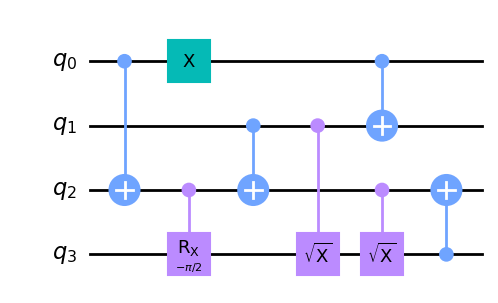

In [21]:
circmqc.draw('mpl')

In [22]:
mqc = circmqc.to_gate(label = ' MQC')

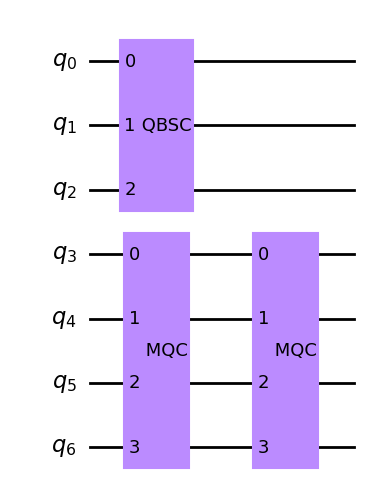

In [24]:
qc2.append(mqc, [3,4,5,6])
qc2.draw('mpl')